<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project: Startup Recommender
## Yanda DSI 33

# Table of contents
1. [Background and Problem Statement](#introduction)
2. [Data Cleaning](#datacleaning)
3. [EDA and Data Visualisation](#eda) 
4. [Modelling](#modelling)
5. [Conclusion and Recommendations](#final)

# Background: <a name="introduction"></a>
Singapore is often considered a startup-friendly environment due to its pro-business policies, highly educated workforce, and strong support from the government. The city-state has a developed infrastructure and a stable political environment, which makes it an attractive location for entrepreneurs to start and grow their businesses.

Singapore has directed a strong focus onto technology and innovation, with it's government investing heavily on initiatives to promote the growth of the startup ecosystem. The government's [StartupSG](https://www.startupsg.gov.sg/) program provides funding, mentorship, and networking opportunities for entrepreneurs, and there are also numerous co-working spaces and incubators available for startups to use.

There are several challenges that start-ups in Singapore may face, some of which include:

1. Access to funding: Securing funding can be a significant challenge for start-ups in Singapore, as investors may be hesitant to invest in early-stage companies with untested business models.

2. Talent attraction and retention: Singapore has a highly competitive talent market, which can make it difficult for start-ups to attract and retain top talent.

3. Intense competition: Singapore is home to a large number of start-ups and established companies, which can make it difficult for new businesses to stand out and gain market share.

4. High operating costs: Singapore has one of the highest costs of living in the world, which can make it expensive for start-ups to operate and attract employees.

However, in spite of the many challenges, Singapore is widely regarded as one of the best environments for startups. In addition to government support, there are also many venture capital firms and angel investors in Singapore who are actively looking to invest in promising startups. The city-state has also attracted many multinational corporations who have set up innovation centers or corporate venture arms in Singapore, which provide opportunities for collaboration and partnerships for local startups.

However Singapore has high cost of living compared to other Southeast Asian countries, which can be a barrier for some startups. Starting up as a innovator or investor can be a daunting task to many, due to the high demands of a start up.

For the first phase of the project, I would be using available dataset from the US as a proof of concept. Subsequently, with more time we would scrape our own dataset with local data.
For this capstone project, supervised machine learning will be done.


# Problem Statement:
Nurturing the newest unicorn in a sea of start ups can be challenging to early start ups and new investors. What can investors and entrepreneurs look out for to predict a success of a start up?


# Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import re
import nltk


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Load Dataset:

The following dataset is obtained from Kaggle. This dataset was used to predict a startup's sucess in the US. The dataset contains features such as city, category code and founding rounds. 
The dataset contains companie's information from 2000 to 2010 period.

In [2]:
df = pd.read_csv('Dataset/startup_data.csv')

In [3]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [6]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

# Rename columns

In [7]:
df.columns = map(str.lower, df.columns.str.replace(' ','_'))

# Missing Data


In [8]:
df.columns[df.isnull().sum()>0]

Index(['unnamed:_6', 'closed_at', 'age_first_milestone_year',
       'age_last_milestone_year', 'state_code.1'],
      dtype='object')

In [9]:
df[['unnamed:_6', 'closed_at', 'age_first_milestone_year',
       'age_last_milestone_year', 'state_code.1']].isnull().sum()

unnamed:_6                  493
closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code.1                  1
dtype: int64

In [10]:
null = df[['unnamed:_6', 'closed_at', 'age_first_milestone_year',
       'age_last_milestone_year', 'state_code.1']]

In [11]:
#convert the number of missing values into percentage
percent_missing = null.isnull().sum() * 100 / len(null)

# sort the series in ascending order
percent_sorted = percent_missing.sort_values(ascending=True)
print(percent_sorted)

state_code.1                 0.108342
age_first_milestone_year    16.468039
age_last_milestone_year     16.468039
unnamed:_6                  53.412784
closed_at                   63.705309
dtype: float64


We will be looking further into the missing values of each of the columns. 

### State Code

In [12]:
df['state_code.1'].value_counts()

CA    487
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: state_code.1, dtype: int64

In [13]:
df['state_code'].value_counts()

CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: state_code, dtype: int64

We can observe that values in the State Code.1 are identical to the State Code column and the State Code.1 column will be dropped.

In [14]:
df.drop(columns = ['state_code.1'], inplace = True)

### Age First Milestone Year & Age Last Milestone Year

Investigation into the dataset shows that Age First Milestone year and Age Last Milestone Year are the years companies first reached their initial and final milestones. Companies without values in these columns have a closed status, signifying that they were unsuccessful startups. We will be filling missing values with 0.

In [15]:
df['age_first_milestone_year'].fillna(0, inplace=True)

In [16]:
df['age_last_milestone_year'].fillna(0, inplace=True)

### Unnamed: 6
Unnamed: 6 is a column that contains the combination of city, state code and zip code which can be found in the respective columns in the dataset. As such this column will be dropped.

In [17]:
df[['city', 'state_code', 'zip_code', 'unnamed:_6']].head()

,city,state_code,zip_code,unnamed:_6
0,San Diego,CA,92101,NaN
1,Los Gatos,CA,95032,NaN
2,San Diego,CA,92121,San Diego CA 92121
3,Cupertino,CA,95014,Cupertino CA 95014
4,San Francisco,CA,94105,San Francisco CA 94105


In [18]:
df.drop(columns = ['unnamed:_6'], inplace = True)

### Closed at 
The closed at column contains the dates when unsuccessful start ups are cease operations. If the startups are acquired, they do not contain a closed at date, as they are still in operation. We will be dropping this column as it is relative to the status condition.

In [19]:
df.drop(columns = ['closed_at'], inplace = True)

In [20]:
# Check to see if there is any more null values
df.columns[df.isnull().sum()>0]

Index([], dtype='object')

## Checking for duplicates

In [21]:
df.duplicated().value_counts()

False    923
dtype: int64

## Sorting Columns into Numerical and Catergorical

In [22]:
# status of the company signify if the start up is successful or not. Hence we will map acquired to 1 and closed to 0
df["status"] = df["status"].map({'acquired':'1', 'closed':'0'}).astype(int)

In [23]:
df['status'].head()

0    1
1    1
2    1
3    1
4    0
Name: status, dtype: int32

### Numerical Columns

In [24]:
num_col = list(col for col in df.select_dtypes('number').columns)
num_col

['unnamed:_0',
 'latitude',
 'longitude',
 'labels',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'is_ca',
 'is_ny',
 'is_ma',
 'is_tx',
 'is_otherstate',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'has_vc',
 'has_angel',
 'has_rounda',
 'has_roundb',
 'has_roundc',
 'has_roundd',
 'avg_participants',
 'is_top500',
 'status']

### Catergorical Columns

In [25]:
cat_col = list(col for col in df.select_dtypes([object]).columns)
cat_col

['state_code',
 'zip_code',
 'id',
 'city',
 'name',
 'founded_at',
 'first_funding_at',
 'last_funding_at',
 'category_code',
 'object_id']

# Exploratory Data Analysis <a name="eda"></a>

In [26]:
df.describe()

,unnamed:_0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_othercategory,has_vc,has_angel,has_rounda,has_roundb,has_roundc,has_roundd,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,2.552196,3.971462,7.710726,2.310943,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.947421,3.424843,7.265776,1.390922,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,0.000000,1.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.000000,3.783600,5.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.002700,6.039750,10.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


Text(0.5, 1.0, 'Heatmap of all numerical values')

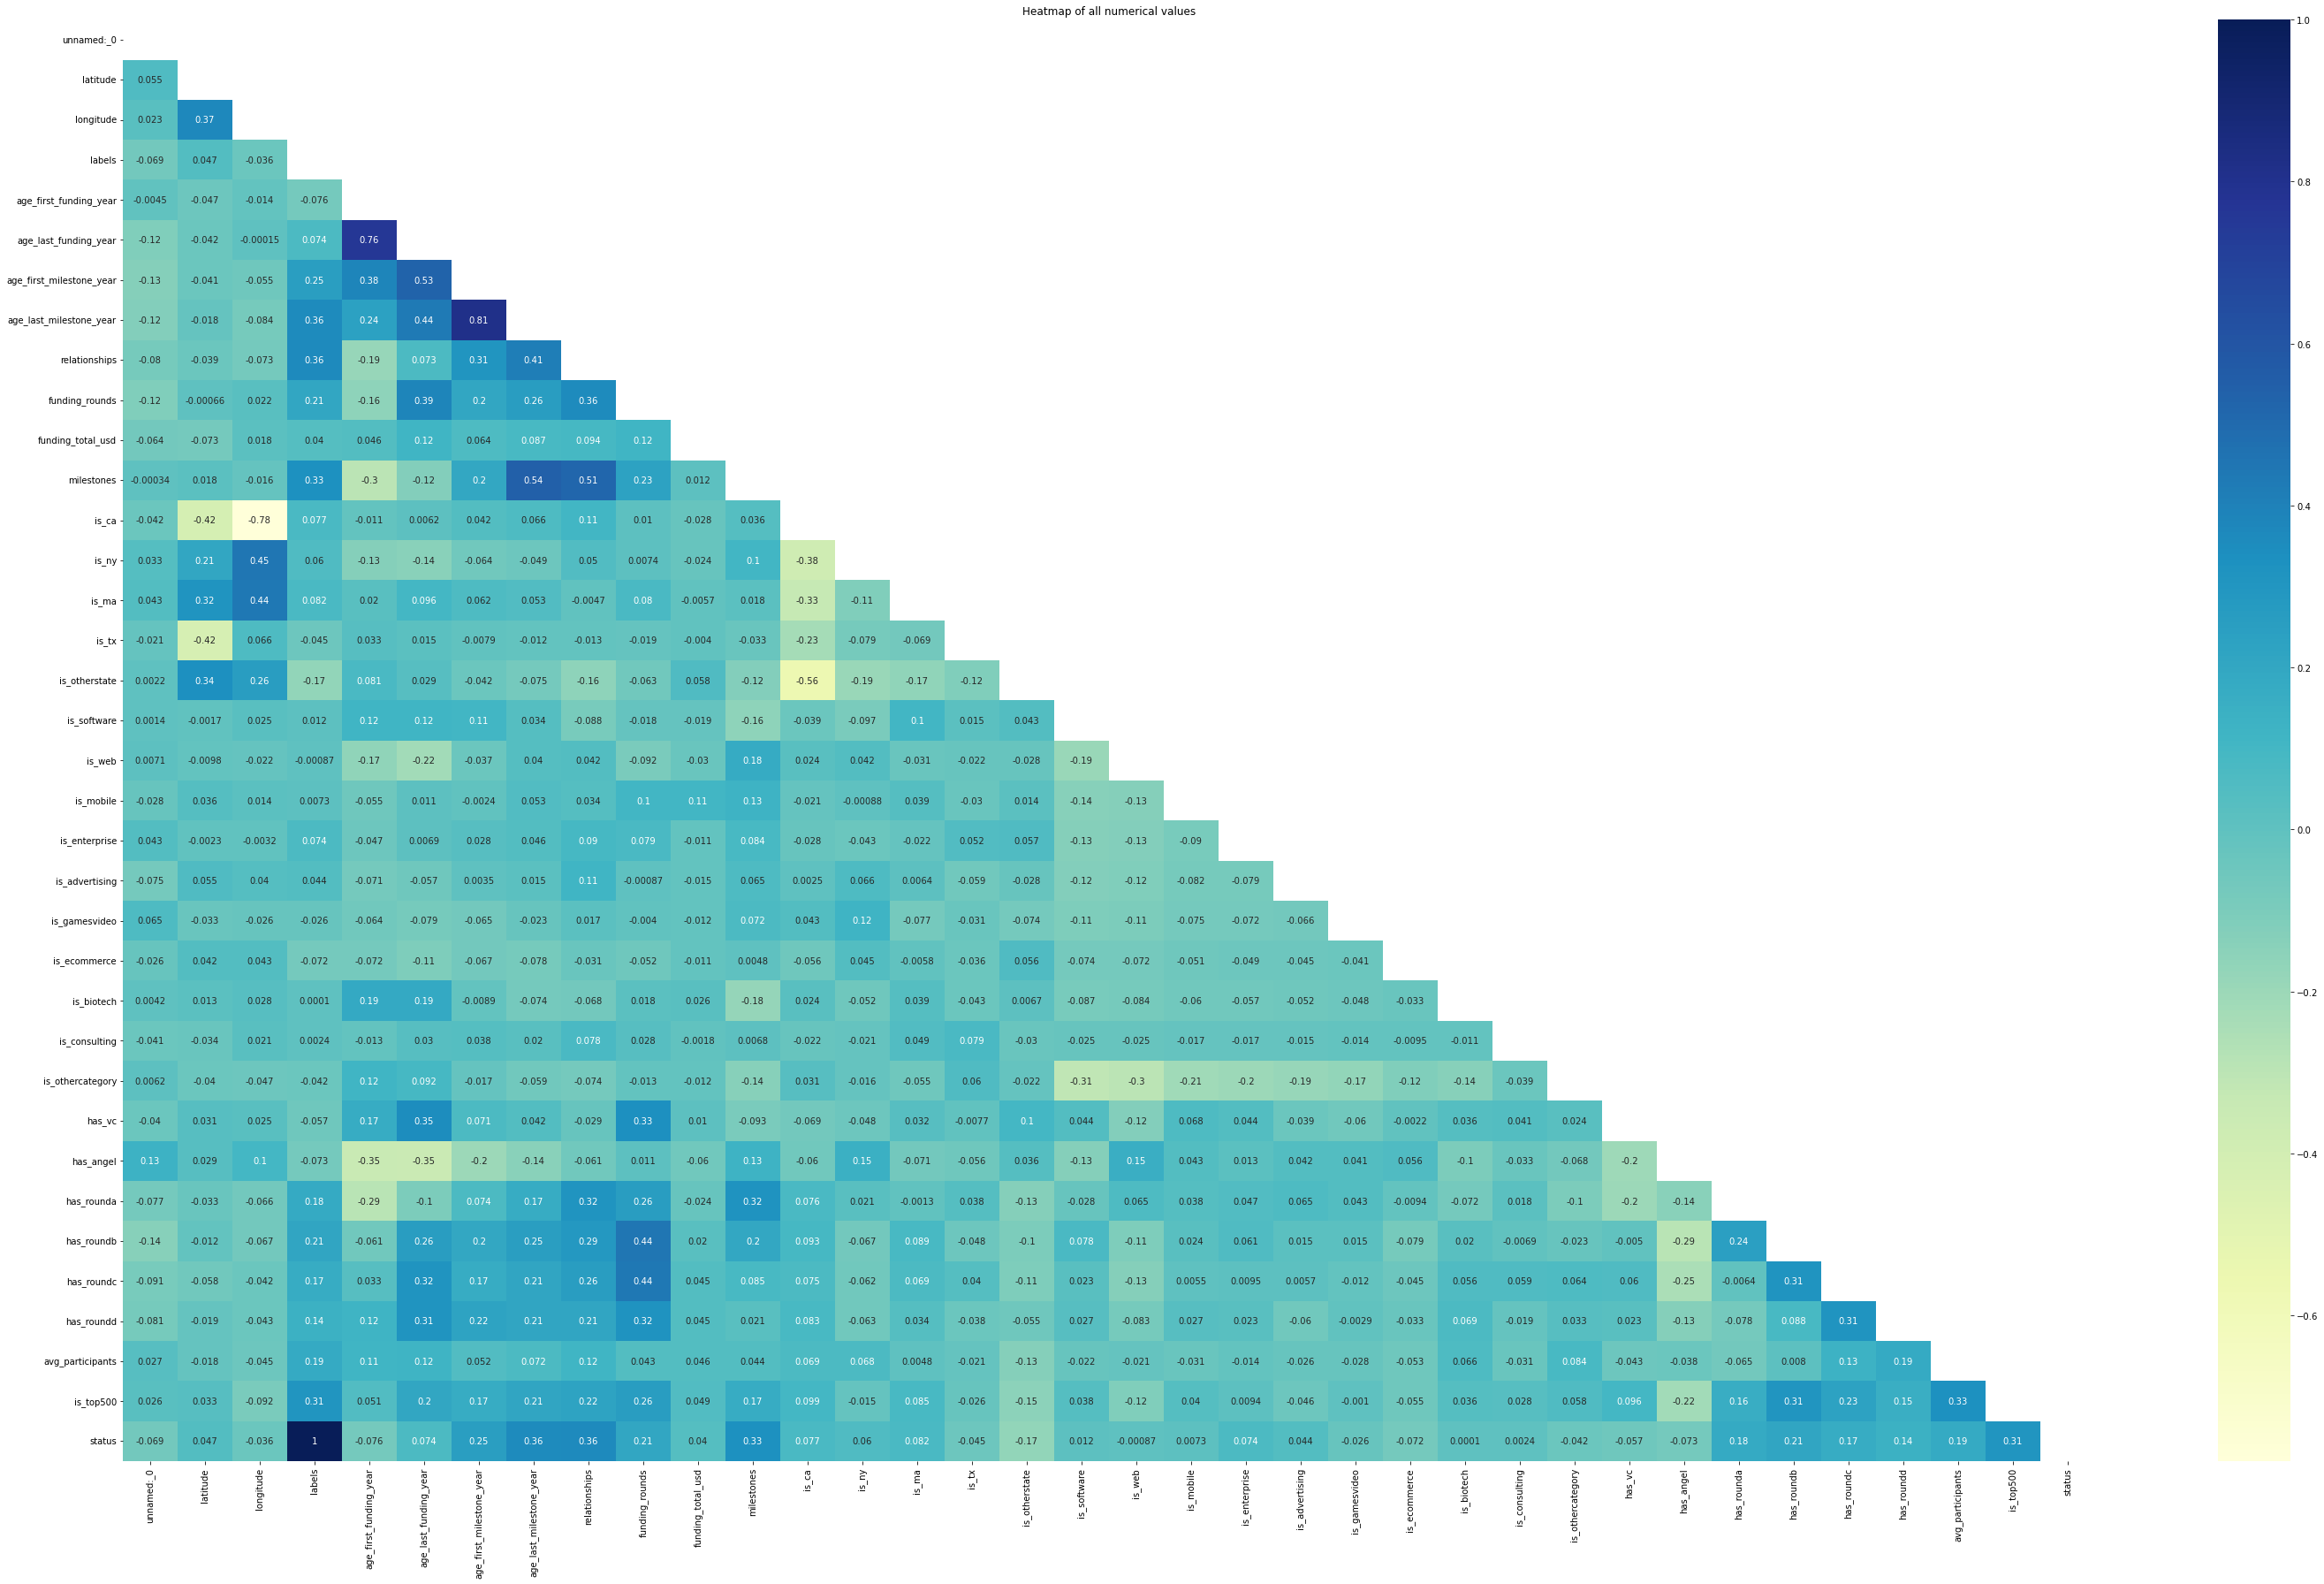

In [27]:
# dictate figure size
plt.figure(figsize=(50,30))

# create mask to hide upper half
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# plotting the heatmap with title
sns.heatmap(df.corr(), mask=mask, cmap='YlGnBu', annot = True)
plt.title('Heatmap of all numerical values')

labels                      1.000000
age_first_milestone_year    0.250163
age_last_milestone_year     0.358600
relationships               0.360434
funding_rounds              0.206049
milestones                  0.328260
has_roundb                  0.208257
is_top500                   0.310652
status                      1.000000
dtype: float64

Index(['labels', 'age_first_milestone_year', 'age_last_milestone_year',
       'relationships', 'funding_rounds', 'milestones', 'has_roundb',
       'is_top500', 'status'],
      dtype='object')

Text(0.5, 1.0, 'Heatmap of numerical features above 20%')

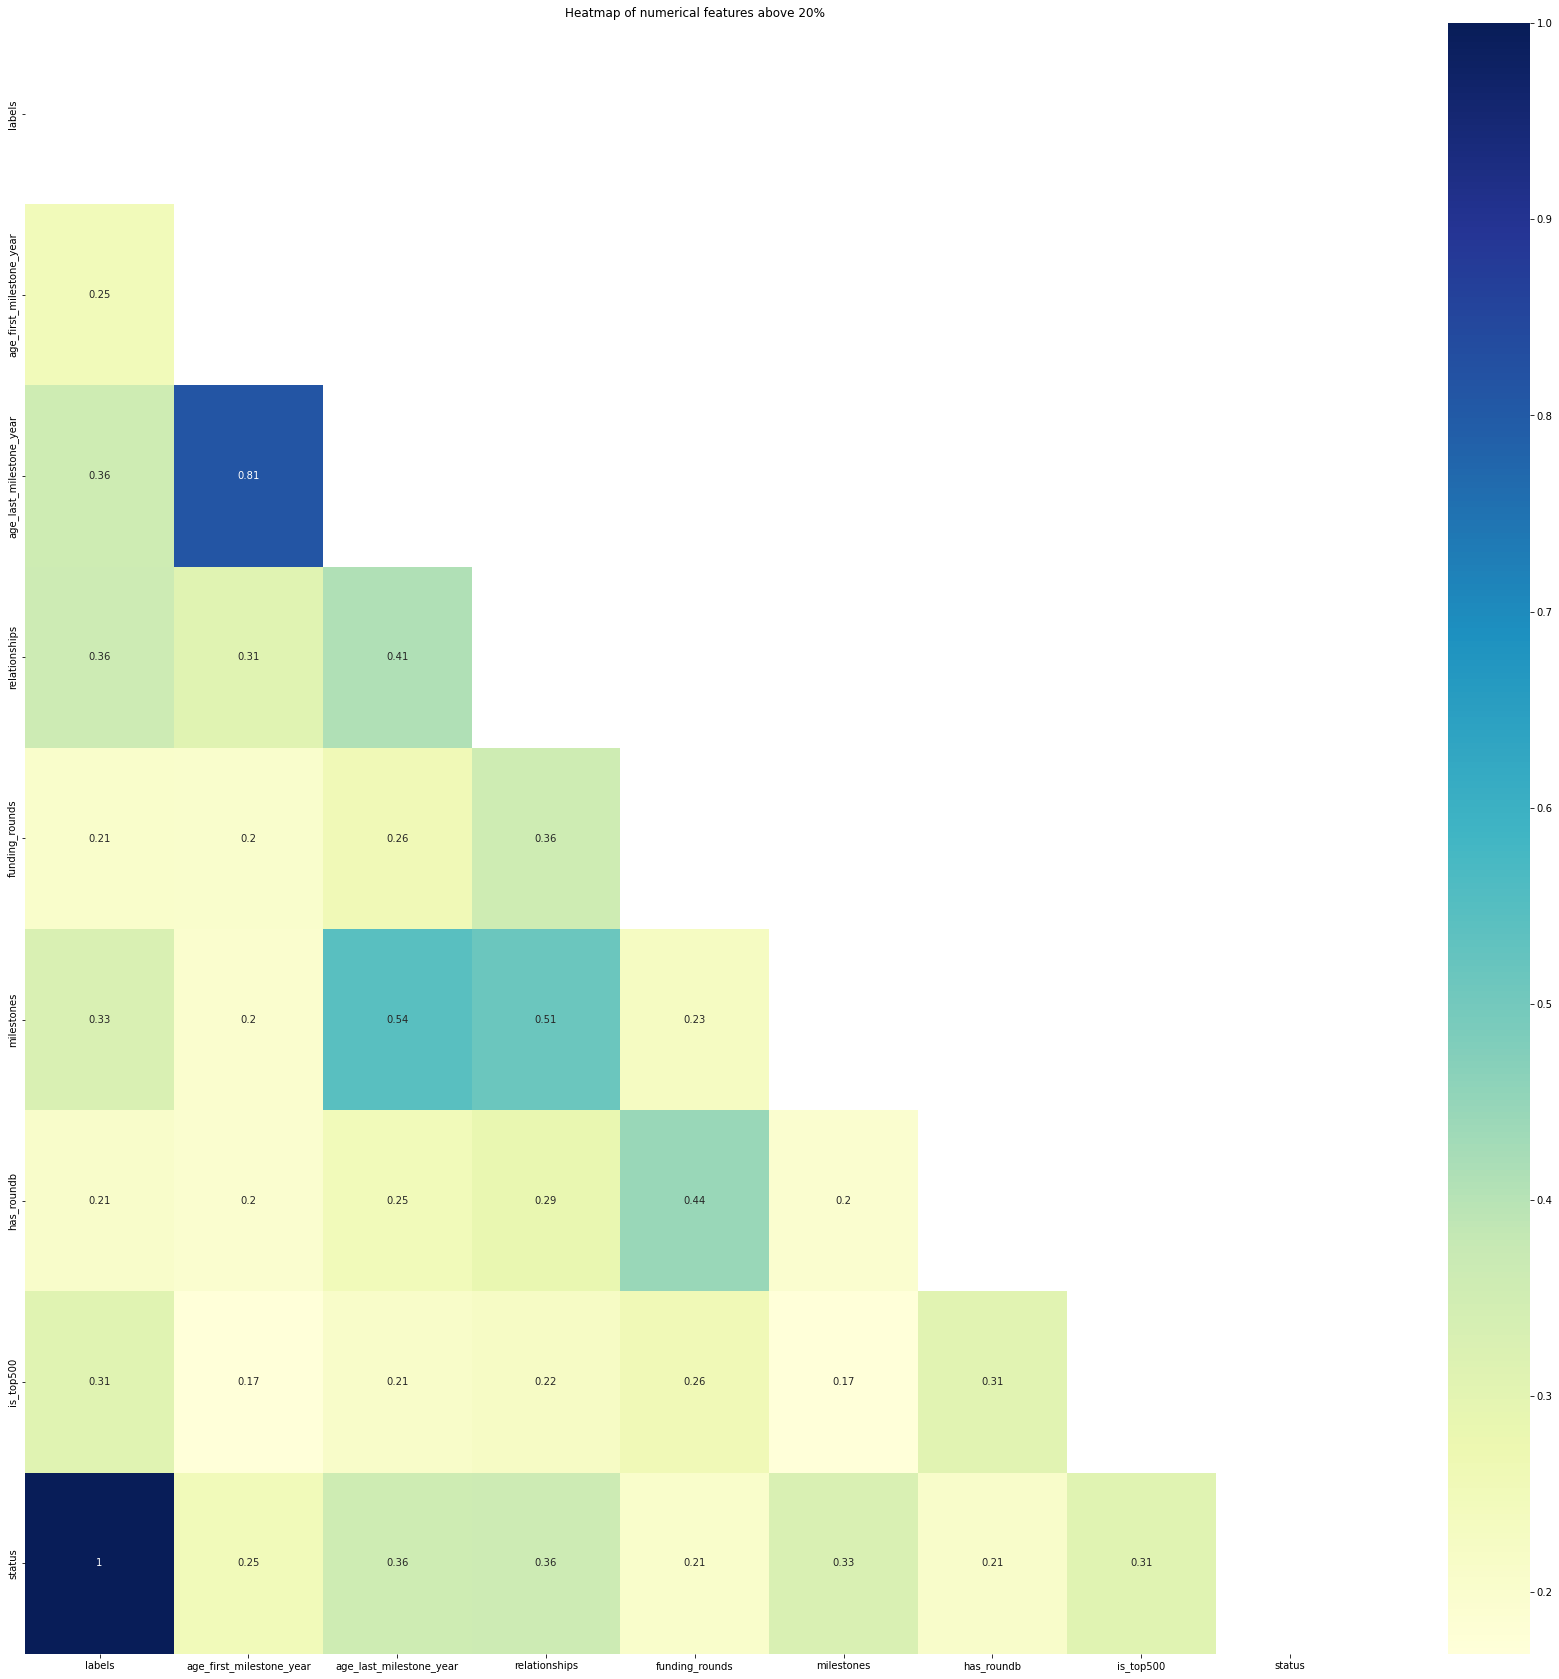

In [28]:
#extracting features that are above a 0.5 threshold
threshold = 0.2

#storing into a variable for the correlation
status_corr = df.corrwith(df['status'])

#filtering the dataframe columns
filtered_corr = status_corr[status_corr>threshold]

display(filtered_corr)

#forming the index for the filtered above 0.2
filtered_index = filtered_corr.index
display(filtered_index)
plt.figure(figsize=(30,30))

mask = np.triu(np.ones_like(df[filtered_index].corr(), dtype=bool))
#display the heatmap
sns.heatmap(df[filtered_index].corr(), cmap = 'YlGnBu', annot= True, mask=mask)
plt.title('Heatmap of numerical features above 20%')

We can observe that there is low correlation and no specific feature has a strong influence on status independently.

## Different business types in startup dataset

In [29]:
df_pivot = pd.pivot_table(df, 
               values=['status'],
                index=['category_code'],
               aggfunc='count' )
print(df_pivot)

                  status
category_code           
advertising           62
analytics             19
automotive             2
biotech               34
cleantech             23
consulting             3
ecommerce             25
education              4
enterprise            73
fashion                8
finance                6
games_video           52
hardware              27
health                 3
hospitality            1
manufacturing          2
medical                7
messaging             11
mobile                79
music                  6
network_hosting       34
news                   8
other                 11
photo_video            7
public_relations      25
real_estate            3
search                12
security              19
semiconductor         35
social                14
software             153
sports                 1
transportation         2
travel                 8
web                  144


In [30]:
df['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

<AxesSubplot:title={'center':'Distribution of Business Types'}, xlabel='Business Types', ylabel='Number of startups'>

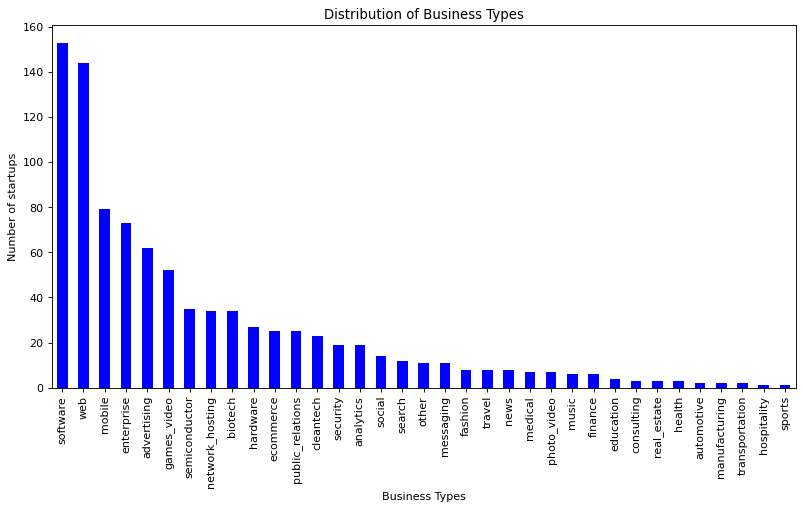

In [31]:
plt.figure(figsize=(12, 6), dpi= 80)
plt.xlabel("Business Types")
plt.ylabel("Number of startups")
plt.title('Distribution of Business Types')

df.category_code.value_counts().plot(kind='bar',color=("blue"))



Majority of startups in the US tend to be in software, mobile and web. The least common startups tend to be in transport, hospitality and sports.

## Number of success counts per business types

[Text(0.5, 0, 'Business Type'), Text(0, 0.5, 'Startups')]

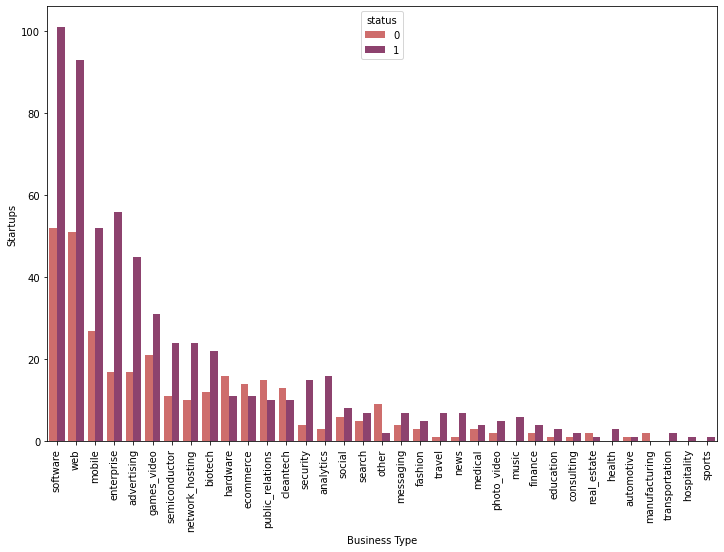

In [32]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="category_code", hue="status", data=df, palette="flare",
              order=df.category_code.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Business Type", ylabel= "Startups")

## Success rate of each business types

In [35]:
df1 = df[df['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
df1.columns=['category_code','total_success']

df2 = df[df['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
df2.columns=['category_code','total_closed']

df3=df.groupby(['category_code']).agg({'status':'count'}).reset_index()
df3.columns=['category_code','total_startup']

df1= df1.merge(df2, on='category_code')
df1= df1.merge(df3, on='category_code')

df1['success_rate']= round((df1['total_success'] / df1['total_startup']) * 100,2)

most_succes_rate = df1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
27,travel,7,1,8,87.50
17,news,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


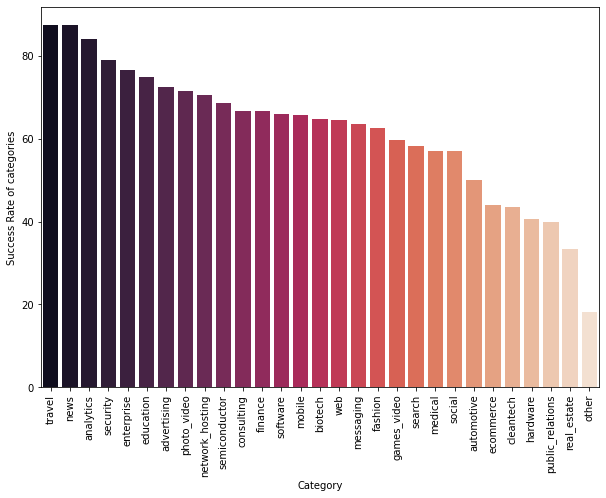

In [36]:
fig, ax = plt.subplots(figsize=(10,7))
graph = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                palette="rocket", ax=ax)
graph = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
graph = ax.set(xlabel="Category", ylabel="Success Rate of categories")

In terms of success, travel, news and analytics are the more common successful categories. However, further investigation shows that this is influenced to the low number of startups. The success rate for the top 3 common startups are:

1. Software: 66.01
2. Mobile: 65.82
3. Web: 64.58

## Number of funding rounds done with each categories

[Text(0.5, 0, 'Business Type'), Text(0, 0.5, 'Startups')]

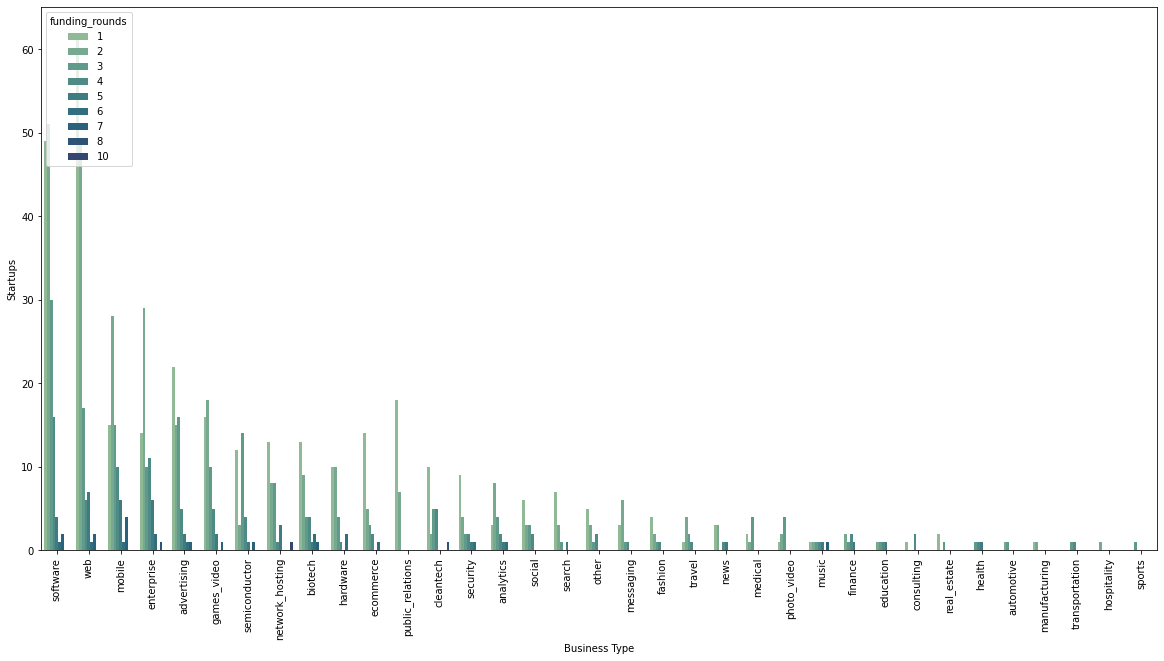

In [33]:
fig, ax = plt.subplots(figsize=(20,10))

sns.countplot(x="category_code", hue="funding_rounds", data=df, palette="crest",
              order=df.category_code.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Business Type", ylabel= "Startups")

<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

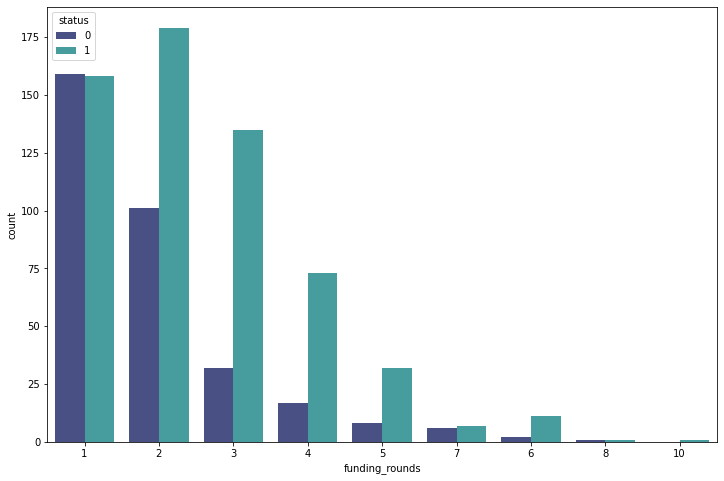

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="mako",
              order=df.funding_rounds.value_counts().index)

The success of a startup is quite uniformed with one funding round, however the likelihood of success increases as funding rounds increase from 2 to 5, before it becomes more uniformed in distribution again.

# Feature Engineering

In [37]:
categories = ['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate']

In [38]:
df = pd.get_dummies(df, columns = ['category_code'])

In [39]:
category = [col for col in df.columns if 'category_code' in col]

In [40]:
print(category)

['category_code_advertising', 'category_code_analytics', 'category_code_automotive', 'category_code_biotech', 'category_code_cleantech', 'category_code_consulting', 'category_code_ecommerce', 'category_code_education', 'category_code_enterprise', 'category_code_fashion', 'category_code_finance', 'category_code_games_video', 'category_code_hardware', 'category_code_health', 'category_code_hospitality', 'category_code_manufacturing', 'category_code_medical', 'category_code_messaging', 'category_code_mobile', 'category_code_music', 'category_code_network_hosting', 'category_code_news', 'category_code_other', 'category_code_photo_video', 'category_code_public_relations', 'category_code_real_estate', 'category_code_search', 'category_code_security', 'category_code_semiconductor', 'category_code_social', 'category_code_software', 'category_code_sports', 'category_code_transportation', 'category_code_travel', 'category_code_web']


## Feature Selection

In [41]:
initial = ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd',
 'milestones', 'is_ca', 'is_ny', 'is_ma', 'is_tx', 'is_otherstate', 'is_software',
 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory',
 'has_vc', 'has_angel', 'has_rounda', 'has_roundb', 'has_roundc', 'has_roundd',
 'avg_participants', 'is_top500', 'category_code_advertising', 'category_code_analytics', 
 'category_code_automotive', 'category_code_biotech', 'category_code_cleantech', 'category_code_consulting', 
 'category_code_ecommerce', 'category_code_education', 'category_code_enterprise', 'category_code_fashion', 
 'category_code_finance', 'category_code_games_video', 'category_code_hardware', 'category_code_health', 
 'category_code_hospitality', 'category_code_manufacturing', 'category_code_medical', 'category_code_messaging', 
 'category_code_mobile', 'category_code_music', 'category_code_network_hosting', 'category_code_news', 
 'category_code_other', 'category_code_photo_video', 'category_code_public_relations', 'category_code_real_estate',
 'category_code_search', 'category_code_security', 'category_code_semiconductor', 'category_code_social',
 'category_code_software', 'category_code_sports', 'category_code_transportation', 'category_code_travel', 
 'category_code_web']

## Modeling <a name="modelling"></a>

In [74]:
print(df['status'].value_counts(normalize=True))
print(df.shape)

1    0.646804
0    0.353196
Name: status, dtype: float64
(923, 80)


We can observe that there is a good spread of data (65 to 35) and we will not be tuning it for class imbalance.

In [42]:
X = df[initial]
y = df['status']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
logreg_class = LogisticRegression()
logreg_class.fit(X_train, y_train)

knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train)

cart_class = DecisionTreeClassifier()
cart_class.fit(X_train, y_train)

bagged_class = BaggingClassifier()
bagged_class.fit(X_train, y_train)

random_forest_class = RandomForestClassifier()
random_forest_class.fit(X_train, y_train)

adaboost_class = AdaBoostClassifier()
adaboost_class.fit(X_train, y_train)

support_vector_class = SVC()
support_vector_class.fit(X_train, y_train)

SVC()

In [45]:
def f1_scorer(model, X_train, X_test, y_train, y_test):
    f1_train = f1_score(y_true = y_train,
                        y_pred = model.predict(X_train))
    f1_test = f1_score(y_true = y_test,
                       y_pred = model.predict(X_test))
    
    print("The training F1-score for " + str(model.__class__.__name__) + " is: " + str(f1_train))
    print("The testing F1-score for " + str(model.__class__.__name__) + " is: " + str(f1_test))
    print()

In [46]:
f1_scorer(logreg_class, X_train, X_test, y_train, y_test)
f1_scorer(knn_class, X_train, X_test, y_train, y_test)
f1_scorer(cart_class, X_train, X_test, y_train, y_test)
f1_scorer(bagged_class, X_train, X_test, y_train, y_test)
f1_scorer(random_forest_class, X_train, X_test, y_train, y_test)
f1_scorer(adaboost_class, X_train, X_test, y_train, y_test)
f1_scorer(support_vector_class, X_train, X_test, y_train, y_test)

The training F1-score for LogisticRegression is: 0.8480635551142006
The testing F1-score for LogisticRegression is: 0.8170212765957446

The training F1-score for KNeighborsClassifier is: 0.8540856031128405
The testing F1-score for KNeighborsClassifier is: 0.7634854771784232

The training F1-score for DecisionTreeClassifier is: 1.0
The testing F1-score for DecisionTreeClassifier is: 0.7577092511013217

The training F1-score for BaggingClassifier is: 0.9855072463768116
The testing F1-score for BaggingClassifier is: 0.8319327731092436

The training F1-score for RandomForestClassifier is: 1.0
The testing F1-score for RandomForestClassifier is: 0.8536585365853658

The training F1-score for AdaBoostClassifier is: 0.8884462151394422
The testing F1-score for AdaBoostClassifier is: 0.8487394957983194

The training F1-score for SVC is: 0.8824662813102119
The testing F1-score for SVC is: 0.8127490039840638



# Hyper Parameter Tuning

### K Nearest Neighbor GridSearch

In [47]:
knn_sc = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [48]:
knn_sc.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'sc': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [49]:
sc_params = {
 'knn__leaf_size': [30,50],
 'knn__n_neighbors': [5],
 'knn__p': [2]
}

In [50]:
knn_sc_gs = GridSearchCV(knn_sc, 
                  param_grid=sc_params,
                  scoring = 'f1',
                  cv=5) # cross validate 5 times
knn_sc_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__leaf_size': [30, 50], 'knn__n_neighbors': [5],
                         'knn__p': [2]},
             scoring='f1')

In [51]:
knn_sc_gs.best_params_

{'knn__leaf_size': 30, 'knn__n_neighbors': 5, 'knn__p': 2}

In [52]:
f1_scorer(knn_sc_gs, X_train, X_test, y_train, y_test)

The training F1-score for GridSearchCV is: 0.8540856031128405
The testing F1-score for GridSearchCV is: 0.7634854771784232



In [70]:
preds = knn_sc_gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
spec = tn / (tn + fp)

print(f"GridSearch Best Score for RF + CVEC: {knn_sc_gs.best_score_}")
print('')
print(f"Train score for RF + CVEC: {knn_sc_gs.score(X_train, y_train)}")
print(f"Test score for RF + CVEC: {knn_sc_gs.score(X_test, y_test)}")
print('')
print('Specificity for RF + CVEC:', spec)

GridSearch Best Score for RF + CVEC: 0.7889261844982911

Train score for RF + CVEC: 0.8540856031128405
Test score for RF + CVEC: 0.7634854771784232

Specificity for RF + CVEC: 0.4931506849315068


In [54]:
y_pred = knn_sc_gs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.49      0.56        73
           1       0.71      0.82      0.76       112

    accuracy                           0.69       185
   macro avg       0.68      0.66      0.66       185
weighted avg       0.69      0.69      0.68       185



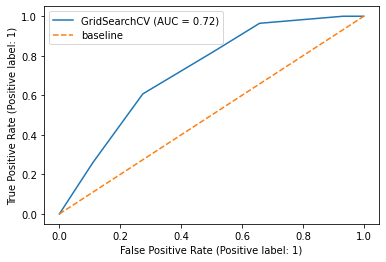

In [55]:
plot_roc_curve(knn_sc_gs, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

### Logisitic Regression GridSearchCV

In [56]:
log_sc = Pipeline([
    ('sc', StandardScaler()),
    ('logreg_class', LogisticRegression())
])

In [57]:
log_sc.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()), ('logreg_class', LogisticRegression())],
 'verbose': False,
 'sc': StandardScaler(),
 'logreg_class': LogisticRegression(),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'logreg_class__C': 1.0,
 'logreg_class__class_weight': None,
 'logreg_class__dual': False,
 'logreg_class__fit_intercept': True,
 'logreg_class__intercept_scaling': 1,
 'logreg_class__l1_ratio': None,
 'logreg_class__max_iter': 100,
 'logreg_class__multi_class': 'auto',
 'logreg_class__n_jobs': None,
 'logreg_class__penalty': 'l2',
 'logreg_class__random_state': None,
 'logreg_class__solver': 'lbfgs',
 'logreg_class__tol': 0.0001,
 'logreg_class__verbose': 0,
 'logreg_class__warm_start': False}

In [58]:
log_sc_params = {
 'logreg_class__penalty': ['l2','20'],
 'logreg_class__random_state': [None],
 'logreg_class__solver': ['lbfgs','liblinear','sag'] }

In [59]:
log_sc_gs = GridSearchCV(log_sc, 
                  param_grid=log_sc_params,
                  scoring = 'f1',
                  cv=5) # cross validate 5 times
log_sc_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('logreg_class', LogisticRegression())]),
             param_grid={'logreg_class__penalty': ['l2', '20'],
                         'logreg_class__random_state': [None],
                         'logreg_class__solver': ['lbfgs', 'liblinear', 'sag']},
             scoring='f1')

In [71]:
preds = log_sc_gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
spec = tn / (tn + fp)

print(f"GridSearch Best Score for RF + CVEC: {log_sc_gs.best_score_}")
print('')
print(f"Train score for RF + CVEC: {log_sc_gs.score(X_train, y_train)}")
print(f"Test score for RF + CVEC: {log_sc_gs.score(X_test, y_test)}")
print('')
print('Specificity for RF + CVEC:', spec)

GridSearch Best Score for RF + CVEC: 0.8106673240638436

Train score for RF + CVEC: 0.8480635551142006
Test score for RF + CVEC: 0.8170212765957446

Specificity for RF + CVEC: 0.6301369863013698


In [61]:
y_pred = log_sc_gs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68        73
           1       0.78      0.86      0.82       112

    accuracy                           0.77       185
   macro avg       0.76      0.74      0.75       185
weighted avg       0.77      0.77      0.76       185



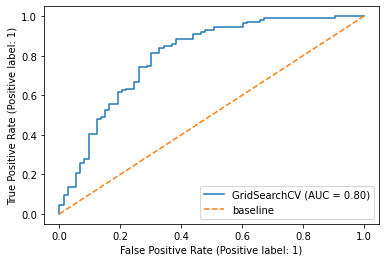

In [62]:
plot_roc_curve(log_sc_gs, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

### Adaboost Classifier GridsearchCV

In [63]:
ada_sc = Pipeline([
    ('sc', StandardScaler()),
    ('ada', AdaBoostClassifier())
])

In [64]:
ada_sc.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()), ('ada', AdaBoostClassifier())],
 'verbose': False,
 'sc': StandardScaler(),
 'ada': AdaBoostClassifier(),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'ada__algorithm': 'SAMME.R',
 'ada__base_estimator': None,
 'ada__learning_rate': 1.0,
 'ada__n_estimators': 50,
 'ada__random_state': None}

In [65]:
ada_sc_params = {
 'ada__base_estimator': [None],
 'ada__learning_rate': [1.0],
 'ada__n_estimators': [50,60,70],
 'ada__random_state': [None]}

In [66]:
ada_sc_gs = GridSearchCV(ada_sc, 
                  param_grid=ada_sc_params,
                  scoring = 'f1',
                  cv=5) # cross validate 5 times
ada_sc_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__base_estimator': [None],
                         'ada__learning_rate': [1.0],
                         'ada__n_estimators': [50, 60, 70],
                         'ada__random_state': [None]},
             scoring='f1')

In [72]:
preds = ada_sc_gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
spec = tn / (tn + fp)

print(f"GridSearch Best Score for RF + CVEC: {ada_sc_gs.best_score_}")
print('')
print(f"Train score for RF + CVEC: {ada_sc_gs.score(X_train, y_train)}")
print(f"Test score for RF + CVEC: {ada_sc_gs.score(X_test, y_test)}")
print('')
print('Specificity for RF + CVEC:', spec)

GridSearch Best Score for RF + CVEC: 0.8380133710073521

Train score for RF + CVEC: 0.8979187314172447
Test score for RF + CVEC: 0.8389830508474576

Specificity for RF + CVEC: 0.6575342465753424


In [67]:
y_pred = ada_sc_gs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        73
           1       0.80      0.88      0.84       112

    accuracy                           0.79       185
   macro avg       0.79      0.77      0.78       185
weighted avg       0.79      0.79      0.79       185



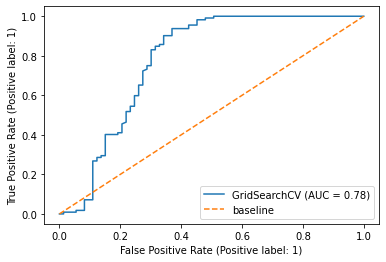

In [68]:
plot_roc_curve(ada_sc_gs, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

# Conclusion and Recommendations <a name="final"></a>

|Model|Train Score|Test SCore|Specificity|F1 Score|
|---|---|---|---|---|
|**KNN**|0.85|0.76|0.49|0.69|
|**Logistic Regression**|0.84|0.81|0.63|0.77|
|**Adaboost**|0.89|0.83|0.65|0.79|


As we can see the best performing model is `Adaboost` after hyper parameter tuning in predicting the success of a start up. 
Majority of the start ups in the US dataset tend to be in software, web and mobile. Out of these categories, travel, news and analytics have the highest success rates.
By analyzing various data points such as funding history, team composition, and industry trends, the model can provide insights into the likelihood of a startup's success.
In conclusion, a classifier model can be a valuable tool for predicting the success of a startup, but it is important to be aware of its limitations. The model's predictions are only as good as the data it is trained on, and it may not take into account other important factors such as market conditions and timing. Additionally, startup success is a multidimensional construct and depends on various factors such as the quality of the management team and the company's ability to adapt to changing market conditions.

Recommendations:
Investors and new startups should focus on securing funding and researching into trending businesses. Marketing and social media are important once launch of the product or service to increase visibility of the product. Products or services can also offer attractive bundles or offers to draw in crowd during launch and retain a customer base for future scaling of the business. 

## Limitations 

1. Data availability and quality: The model is only as good as the data it is trained on. If the data is incomplete, inaccurate, or biased, the model's predictions will also be affected. Additionally, startups in their early stages may not have enough historical data available to train a model on. The model is operating on a dataset of startups in the 2000 to 2010 period. Due to pandemic, the nature of all business have shifted and a refocus of priority and consumer habits has changed the success of different start ups. Without time constraint, further data collection specific to Singapore can be scrapped and collected, as success rates of start ups in different country can be much more varied. 

2. Lack of context: A classifier model can only make predictions based on the data it is given, and may not take into account other important factors such as market conditions and timing.

3. Human factors: A startup's success also depends on various human factors such as the quality of the management team and the company's ability to adapt to changing market conditions which make these factors hard to quantify.
